In [26]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

In [27]:
# データが保存されているフォルダのパスを指定
folder_path = R'C:/Users/stomo/Desktop/study/datasets/m5data/240729/'

In [28]:
file_pattern = '*.csv'
files = glob.glob(f'{folder_path}/{file_pattern}')
print(files)

['C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142952-COM18.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM10.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM11.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM12.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM13.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM14.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM15.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM16.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM17.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/240729\\device-monitor-240729-142953-COM3.csv', 'C:/Users/stomo/Desktop/study/datasets/m5data/2407

In [29]:
# ヒートマップを作成する関数
def make_heat(data, com_num):
    # データフレームを作成
    plot_data = pd.DataFrame({
        'x': data.iloc[:, -2],
        'y': data.iloc[:, -1],
        'RSSI': data.iloc[:, -3]
    })

    # 座標ごとのRSSIの平均を計算
    average_rssi = plot_data.groupby(['x', 'y'])['RSSI'].mean().unstack(0)

    # ヒートマップをプロット
    plt.figure(figsize=(12, 4))
    norm = Normalize(vmin=-100, vmax=-40)
    plt.imshow(average_rssi, cmap='coolwarm', norm=norm)
    plt.colorbar(label='RSSI')
    plt.xticks(np.arange(9), labels=np.arange(9))
    plt.yticks(np.arange(3), labels=np.arange(3))
    plt.title('Heatmap of com' + com_num)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis()
    plt.show()


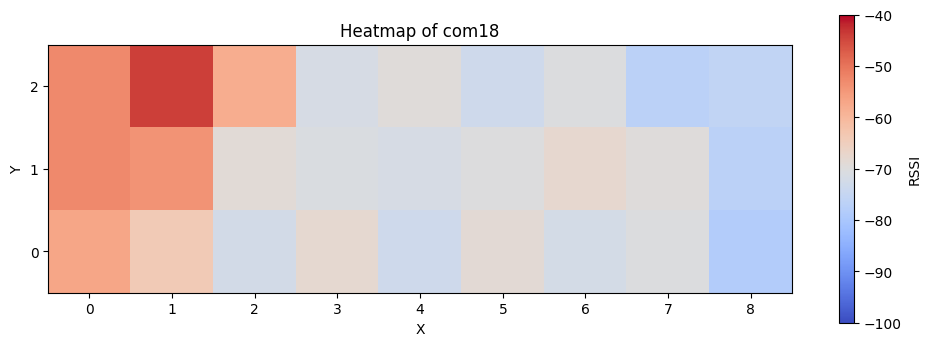

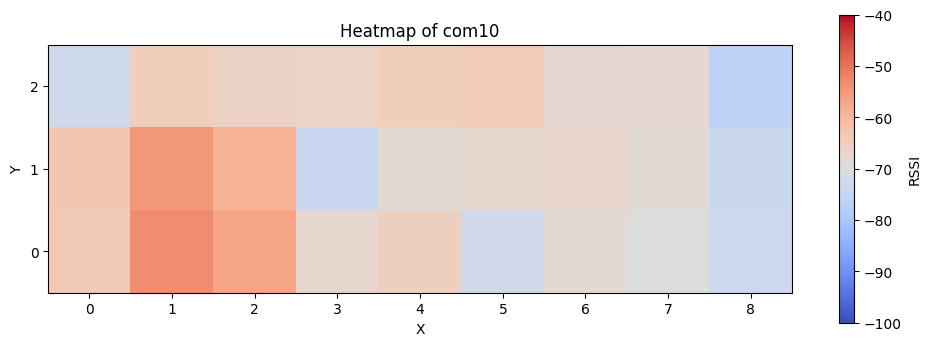

C:\Users\stomo\AppData\Local\Temp\ipykernel_16888\840452033.py:16: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(average_rssi, cmap='coolwarm', norm=norm)
C:\Users\stomo\AppData\Local\Temp\ipykernel_16888\840452033.py:16: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(average_rssi, cmap='coolwarm', norm=norm)


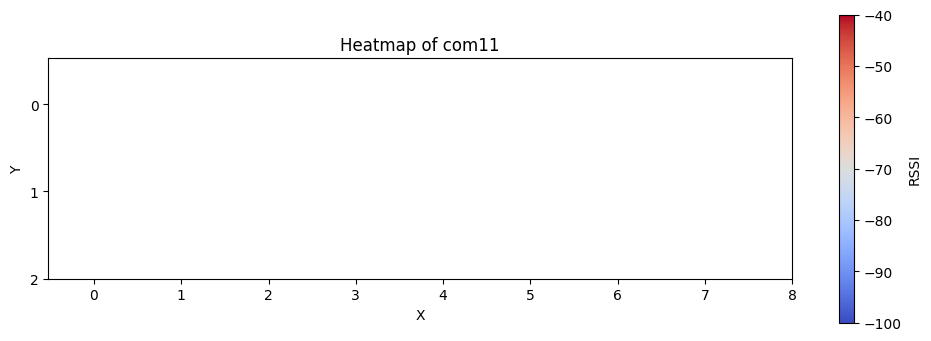

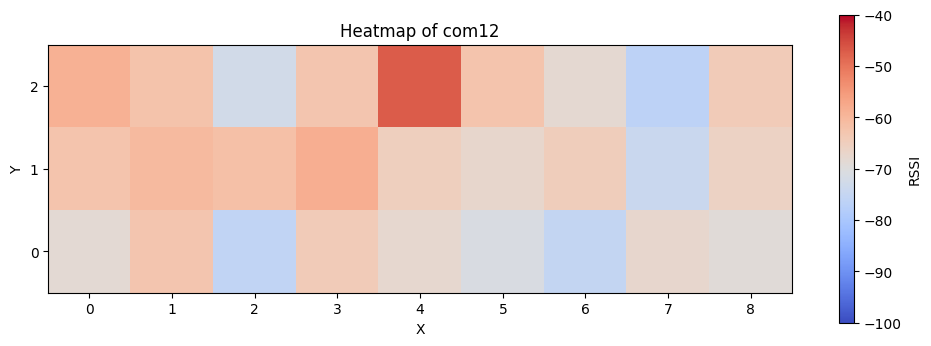

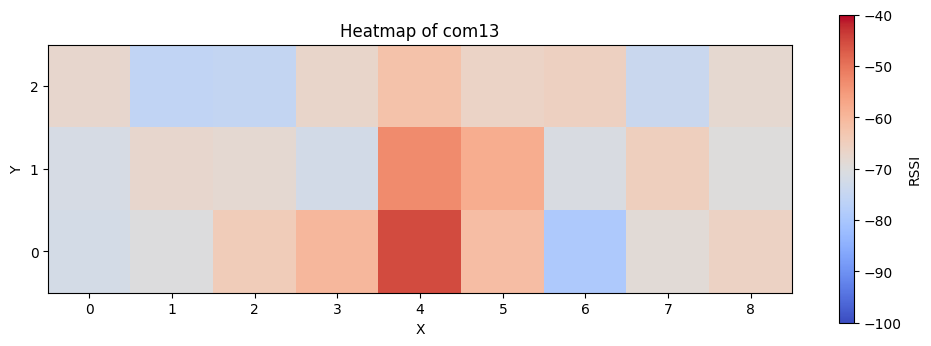

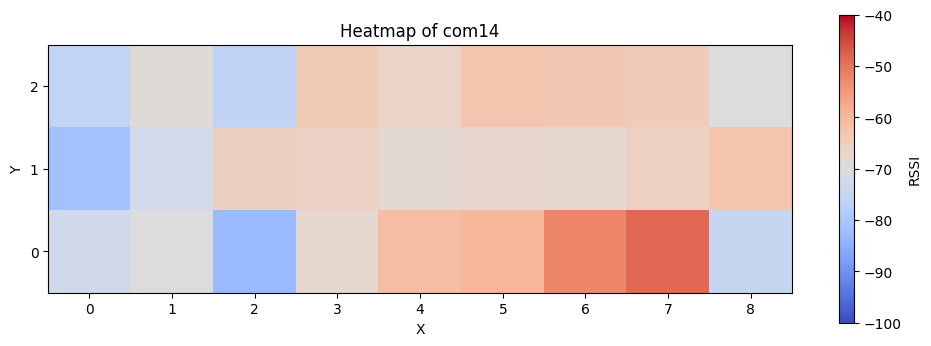

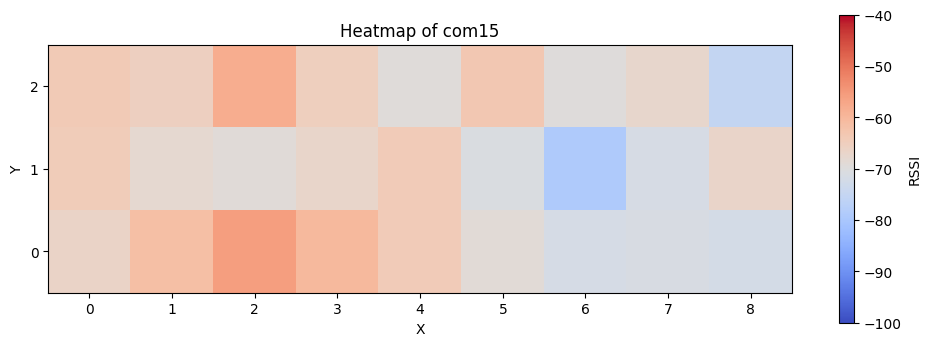

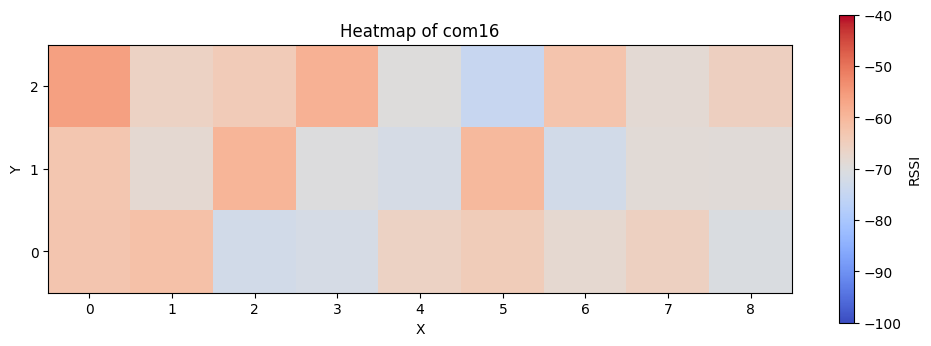

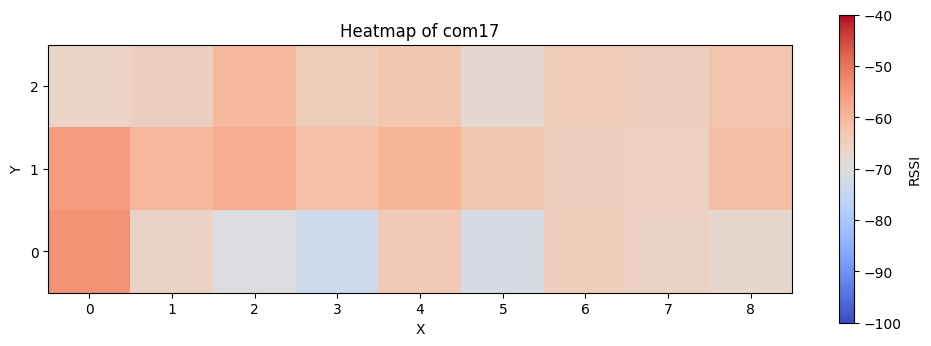

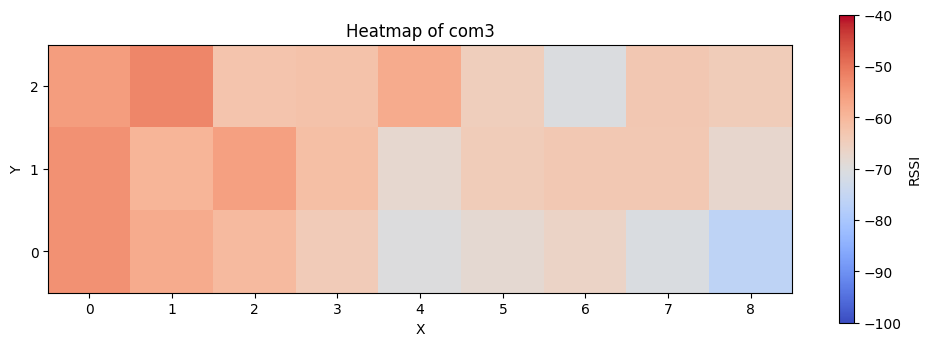

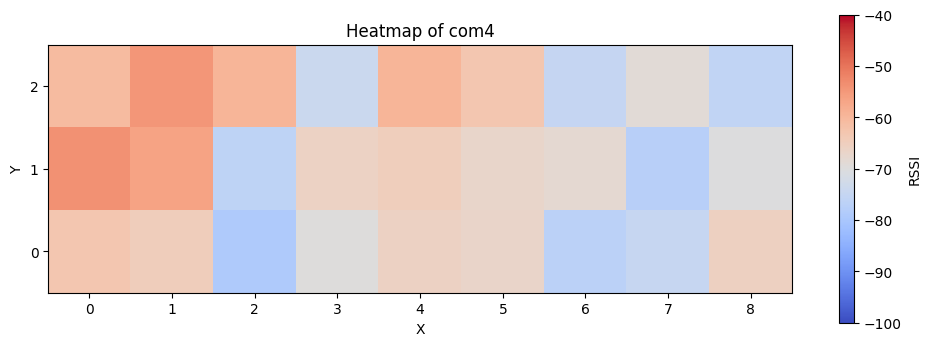

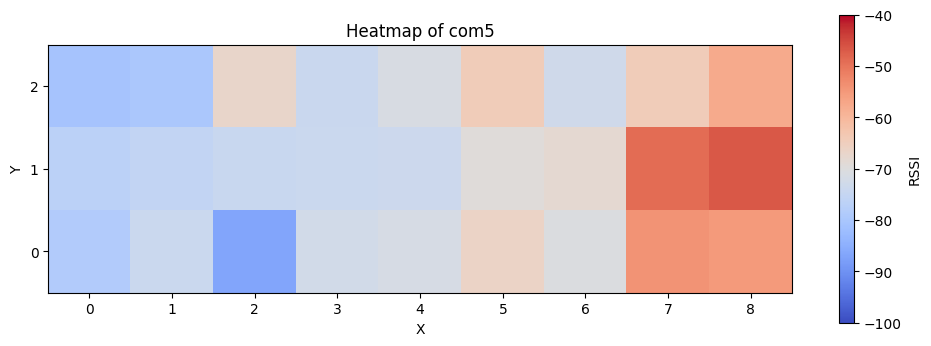

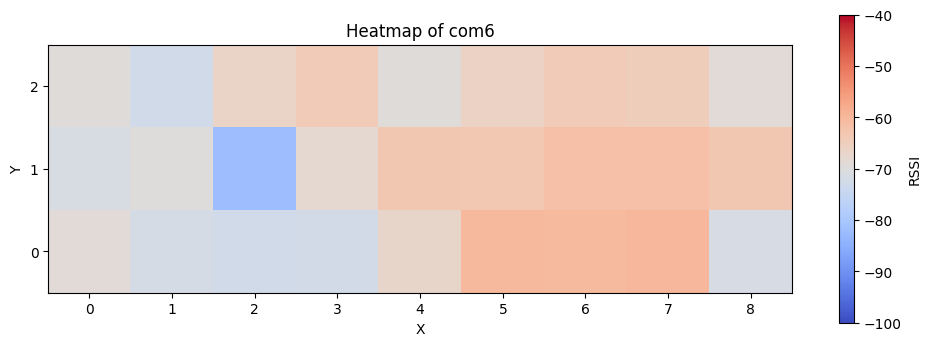

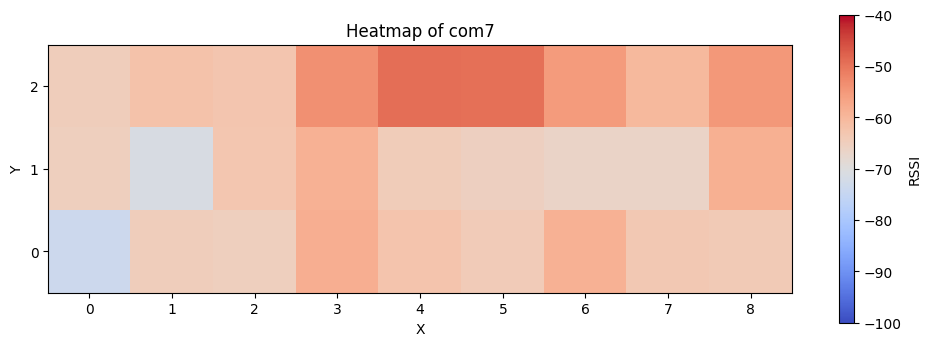

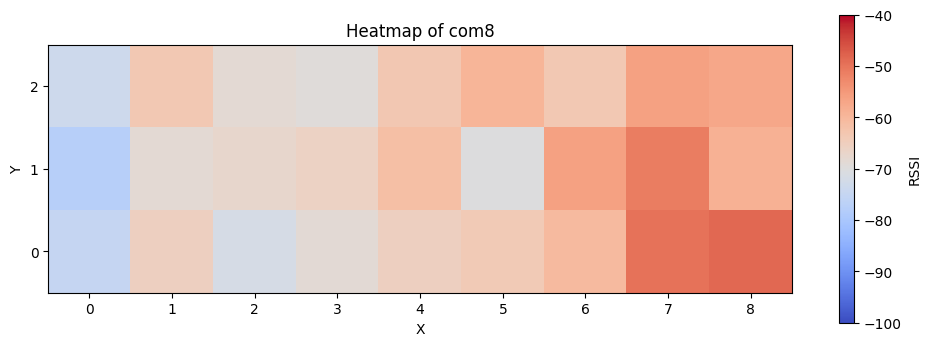

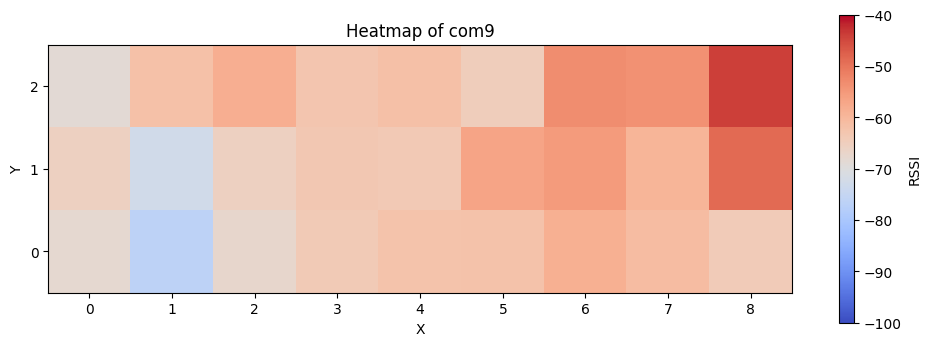

In [30]:
for file in files:
    com_data = pd.read_csv(file)
    # ファイル名からCOM番号を抽出
    com_num = os.path.splitext(os.path.basename(file))[0].split('-COM')[-1]
    make_heat(com_data, com_num)